# Introduction to CNN

Simple explanation of convolutional neural network | Deep Learning Tutorial 23 (Tensorflow & Python): https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=24&ab_channel=codebasics

In [71]:
%%HTML
<iframe frameborder="0" scrolling="no" marginheight="0" marginwidth="0"width="800" height="443" type="text/html" src="https://www.youtube.com/embed/zfiSAzpy9NM?autoplay=0&fs=0&iv_load_policy=3&showinfo=0&rel=0&cc_load_policy=0&start=0&end=0"></iframe>

Image classification using CNN (CIFAR10 dataset) | Deep Learning Tutorial 24 (Tensorflow & Python): https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=24&ab_channel=codebasics

In [72]:
%%HTML
<iframe frameborder="0" scrolling="no" marginheight="0" marginwidth="0"width="800" height="443" type="text/html" src="https://www.youtube.com/embed/7HPwo4wnJeA?autoplay=0&fs=0&iv_load_policy=3&showinfo=0&rel=0&cc_load_policy=0&start=0&end=0"></iframe>

CIFAR-10 datat: https://www.cs.toronto.edu/~kriz/cifar.html

In [73]:
%%HTML
<iframe src="https://www.cs.toronto.edu/~kriz/cifar.html" style="border:0px #ffffff none;" name="myiFrame" scrolling="no" frameborder="1" marginheight="0px" marginwidth="0px" height="700px" width="600px" allowfullscreen></iframe>

In [74]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [75]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

#import ssl
<br>
#ssl._create_default_https_context = ssl._create_unverified_context

-> These to lines of code are added because my SSL certificate has expired. (SSLError occurs when you request a remote URL that does not provide a trusted SSL certificate. The easiest way to fix this issue is to disable SSL verification for that particular web address by passing in verify=False as an argument to the method calls.)
<br>
-> SSL is the Secure Socket Layer protocol that is responsible for creating secure communication between client and server. It is commonly essential for most online businesses, including banks, retailers, and publishers.  This is done by both server and client authentication through a security technique called encryption, which prevents eavesdropping by hackers and identity thieves. 

In [76]:
X_test.shape

(10000, 32, 32, 3)

In [77]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [78]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [79]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [80]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [81]:
classes[6]

'frog'

In [82]:
y_train[6]

2

In [83]:
classes[y_train[6]]

'bird'

In [122]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

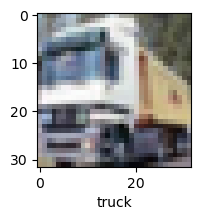

In [123]:
plot_sample(X_train, y_train, 1)

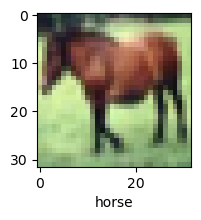

In [124]:
plot_sample(X_train, y_train, 7)

In [87]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [88]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [89]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [90]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8136 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6238 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5423 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4830 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4356 - accuracy: 0.4962


In [91]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.4788 - accuracy: 0.4678


[1.4788206815719604, 0.46779999136924744]

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.32      0.44      1000
           1       0.67      0.51      0.58      1000
           2       0.33      0.39      0.36      1000
           3       0.41      0.23      0.30      1000
           4       0.31      0.59      0.41      1000
           5       0.47      0.28      0.35      1000
           6       0.55      0.45      0.50      1000
           7       0.50      0.57      0.53      1000
           8       0.60      0.62      0.61      1000
           9       0.45      0.70      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [96]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)), 
    
    #dense
    layers.Flatten(), # i don't have to specify input shape in the middle of network, it will figure it our on its own
    layers.Dense(64, activation="relu"), #cnn will do a lot of work, so i dont need so many neurons
    layers.Dense(10, activation="softmax") #softmax activation normalizes probabilities to total sum of 1
])

In [97]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [98]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5178 - accuracy: 0.4494
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1603 - accuracy: 0.5909
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0346 - accuracy: 0.6394
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9575 - accuracy: 0.6685
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8937 - accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8458 - accuracy: 0.7057
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8024 - accuracy: 0.7205
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7623 - accuracy: 0.7354
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7310 - accuracy: 0.7466
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [99]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9293 - accuracy: 0.6882


[0.929268479347229, 0.6881999969482422]

In [102]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.4171260e-03, 2.3694356e-05, 2.4227886e-03, 9.3049192e-01,
        1.4319067e-03, 4.0470999e-02, 1.5472381e-02, 2.4923802e-04,
        7.5007770e-03, 5.1915669e-04],
       [1.2462414e-04, 2.2859771e-03, 7.5699347e-08, 2.0103073e-07,
        1.3148478e-08, 8.0188334e-10, 8.6533930e-10, 1.4450917e-08,
        9.9748683e-01, 1.0221567e-04],
       [4.1199103e-02, 1.9714549e-02, 5.0730014e-04, 6.6510597e-03,
        1.7144329e-04, 4.6691290e-04, 3.4727167e-05, 3.7959912e-03,
        9.1922283e-01, 8.2359947e-03],
       [6.0473150e-01, 1.6515802e-01, 6.6106552e-03, 1.7239375e-03,
        4.1459892e-03, 9.7563112e-05, 5.9707678e-04, 1.8266055e-03,
        2.1156453e-01, 3.5441394e-03],
       [3.4990644e-06, 4.7912413e-06, 9.5950748e-04, 1.1431928e-01,
        5.5562600e-02, 9.5567927e-03, 8.1955665e-01, 2.5005411e-05,
        1.0309491e-05, 1.5796959e-06]], dtype=float32)

In [120]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [121]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

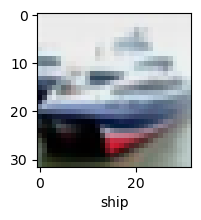

In [125]:
plot_sample(X_test, y_test,1)

In [126]:
classes[y_classes[1]]

'ship'

In [127]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.86      0.73      0.79      1000
           2       0.72      0.43      0.54      1000
           3       0.43      0.60      0.50      1000
           4       0.69      0.62      0.65      1000
           5       0.56      0.66      0.61      1000
           6       0.79      0.74      0.76      1000
           7       0.74      0.76      0.75      1000
           8       0.82      0.77      0.79      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

